<a href="https://colab.research.google.com/github/farhad06/Projects/blob/main/Tweeter-Sentiment-Analysis/Tweeter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Dataset Information**

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#Load text classification pkg
import neattext.functions as nfx

In [25]:
#!pip install neattext

In [26]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/Twitter Sentiments.csv')

In [27]:
df.shape

(31962, 3)

In [28]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [29]:
df.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


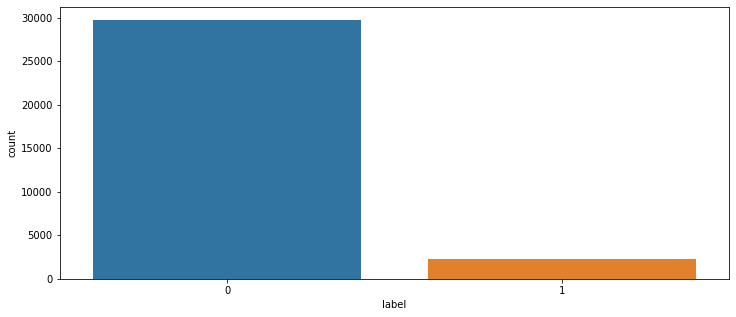

In [31]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,5)
sns.countplot(x='label',data=df)

In [32]:
#remove punctuation without #
def remove_punctuation(text):
    punctuations = '''!()-[]{};:'"\,<>./?@$%^&*_~'''
    punctuationfree="".join([i for i in text if i not in punctuations])
    return punctuationfree

In [33]:
df['clean_tweet']=df['tweet'].apply(remove_punctuation)

In [34]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for #lyft credit i cant use c...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [35]:
#Remove spacial Character
#df['clean_tweet']=df['clean_tweet'].apply(nfx.remove_special_characters)

In [36]:
#Remove spacial number
df['clean_tweet']=df['clean_tweet'].apply(nfx.remove_numbers)

In [37]:
df.tail()

,id,label,tweet,clean_tweet
31957,31958,0,ate @user isz that youuu?ðððððð...,ate user isz that youuuðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",user #sikh #temple vandalised in in #calgary #...
31961,31962,0,thank you @user for you follow,thank you user for you follow


In [38]:
df[df['id']==655]

,id,label,tweet,clean_tweet
654,655,0,"â #gold off highs, back around $1,260 #bl...",â #gold off highs back around #blog #sil...


In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [43]:
def preprocess(text):
  tweet=[]
  doc=nlp(text)
  for token in doc:
    if len(token)<3:
      continue
    else:
      tweet.append(token.lemma_) 
  return " ".join(tweet)      

In [44]:
df['clean_tweet']=df['clean_tweet'].apply(preprocess)

In [45]:
df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,user when father dysfunctional and selfish dra...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thank for lyft credit use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model love take with all the time urð± ðð...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before they leav...
6,7,0,@user camping tomorrow @user @user @user @use...,user camping tomorrow user user user user user...
7,8,0,the next school year is the year for exams.ð...,the next school year the year for examsð¯ th...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,win love the land allin cavs champion clevelan...
9,10,0,@user @user welcome here ! i'm it's so #gr...,user user welcome here its


In [47]:
#!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


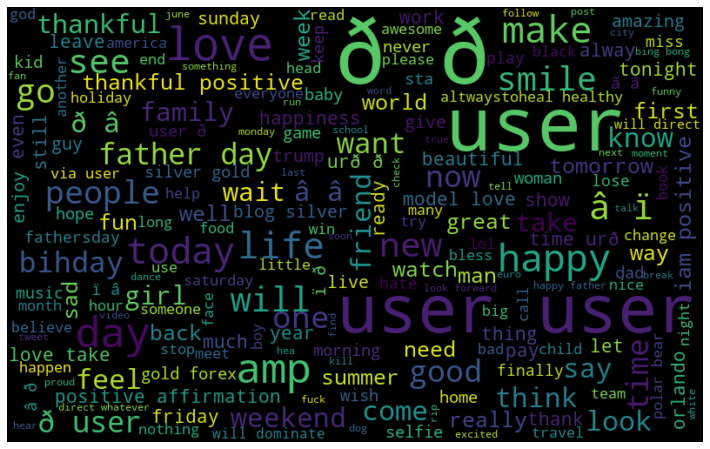

In [48]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

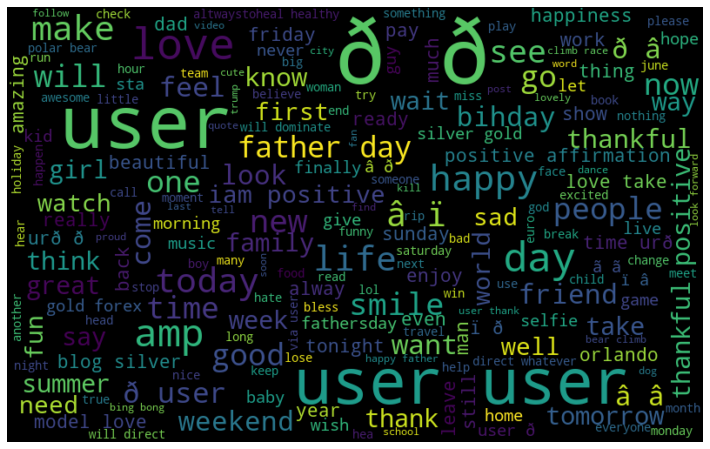

In [49]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

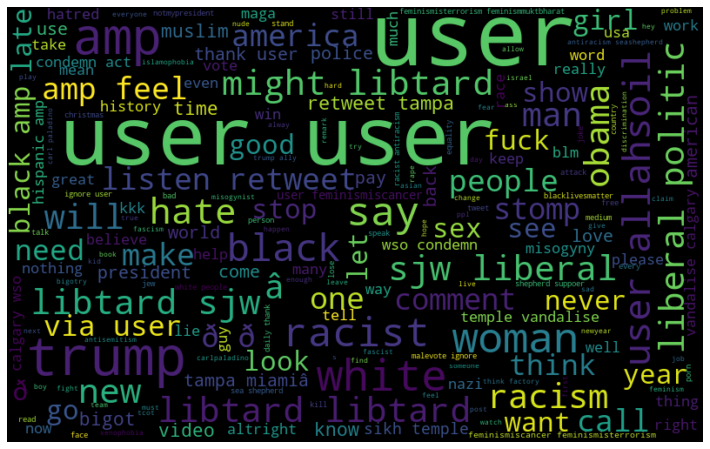

In [50]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [53]:
X_train.shape,y_train.shape

((23971, 1000), (23971,))

In [54]:
X_test.shape,y_test.shape

((7991, 1000), (7991,))

## **Logistic Regression**

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [59]:
logistic_model=LogisticRegression()

In [60]:
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [61]:
logistic_model.score(X_test,y_test)

0.9463146039294206

In [62]:
logistic_model.classes_

array([0, 1])

## **Random Forest**

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [75]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
rfc.score(X_test,y_test)

0.933299962457765

In [78]:
import pickle
with open('logistic_tweeter_sentiment.pkl','wb') as f:
  pickle.dump(logistic_model,f)

In [79]:
import pickle
with open('random_forest_tweeter_sentiment.pkl','wb') as f:
  pickle.dump(rfc,f)